In [1300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
# pd.set_option('display.float_format','{:.4f}'.format)

In [1301]:
data = pd.read_csv('data/nike_dunk_low(pre).csv')

In [1302]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [1303]:
print(data.shape)
data.head()

(173982, 13)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
3,275,129000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
4,240,132000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30


In [1304]:
pd.pivot_table(data, index='product', values='price', aggfunc='mean')

,price
product,
(GS) Nike Dunk Low Black,307352
(GS) Nike Dunk Low Bright Crimson Game Royal,143935
(GS) Nike Dunk Low Championship Grey,247815
(GS) Nike Dunk Low Light Bone Tropical Twist,229326
(GS) Nike Dunk Low PRM Halloween,305311
...,...
Nike x Travis Scott SB Dunk Low,2093267
Nike x Travis Scott SB Dunk Low (Special Box),2922438
Nike x Verdy Girls Don't Cry SB Dunk Low,2083333


In [1305]:
data.groupby('product')['price'].mean()

product
(GS) Nike Dunk Low Black                                   307352
(GS) Nike Dunk Low Bright Crimson Game Royal               143935
(GS) Nike Dunk Low Championship Grey                       247815
(GS) Nike Dunk Low Light Bone Tropical Twist               229326
(GS) Nike Dunk Low PRM Halloween                           305311
                                                            ...  
Nike x Travis Scott SB Dunk Low                           2093267
Nike x Travis Scott SB Dunk Low (Special Box)             2922438
Nike x Verdy Girls Don't Cry SB Dunk Low                  2083333
Nike x Verdy SB Dunk Low Pro Wasted Youth (Regular Box)    326864
Nike x Verdy SB Dunk Low Pro Wasted Youth (Special Box)    401364
Name: price, Length: 268, dtype: float64

## EDA

In [1306]:
df = data.copy()

### Missing Value

In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173982 entries, 0 to 173981
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   size           173982 non-null  int64  
 1   price          173982 non-null  int64  
 2   date           173982 non-null  object 
 3   product        173982 non-null  object 
 4   release_date   173982 non-null  object 
 5   color          173982 non-null  object 
 6   release_price  173982 non-null  int64  
 7   brand          164132 non-null  object 
 8   category       164132 non-null  object 
 9   number         164132 non-null  float64
 10  wish           164132 non-null  float64
 11  review         164132 non-null  float64
 12  transactions   173982 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 17.3+ MB


In [1308]:
df = df[df['number'].notnull()]

In [1309]:
df = df.reset_index(drop=True)

In [1310]:
print(df.shape)
df.head()

(164132, 13)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
3,275,129000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30
4,240,132000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30


In [1311]:
len(set(df['product']))

170

### type 생성

In [1312]:
df['product'].str.contains(' Low', regex=False).value_counts()

True     164081
False        51
Name: product, dtype: int64

In [1313]:
df.loc[df['product'].str.contains(' Low', regex=False), 'type'] = 'Low'

In [1314]:
df.loc[df['product'].str.contains(' Low', regex=False) == False, 'product'].value_counts()

(PS) Nike Dunk low Retro Hyper Cobalt    28
(TD) Nike Dunk low Retro Hyper Cobalt    23
Name: product, dtype: int64

In [1315]:
df.loc[df['product'].str.contains('Dunk low', regex=False), 'type'] = 'Low'

In [1316]:
df['type'].value_counts()

Low    164132
Name: type, dtype: int64

### transactions

In [1317]:
# df = df[df['transactions'] > 50]

In [1318]:
df['transactions'].value_counts()

18150    18150
1450     13050
7758      7758
6700      6700
4450      4450
         ...  
9            9
4            8
3            6
2            2
1            2
Name: transactions, Length: 137, dtype: int64

In [1319]:
df[df['transactions'] == 1450]['product'].value_counts()

Nike Dunk Low SP Samba 2020                  1450
(GS) Nike Dunk Low University Blue           1450
Nike x Travis Scott SB Dunk Low              1450
Nike Dunk Low SP Ceramic                     1450
Nike Dunk Low SE Free.99 White               1450
Nike Dunk Low Retro PRM Halloween            1450
(GS) Nike Dunk Low Varsity Maize             1450
Nike x Parra SB Dunk Low Pro Abstract Art    1450
Nike Dunk Low SE Black Multi Camo            1450
Name: product, dtype: int64

<AxesSubplot:xlabel='transactions', ylabel='Count'>

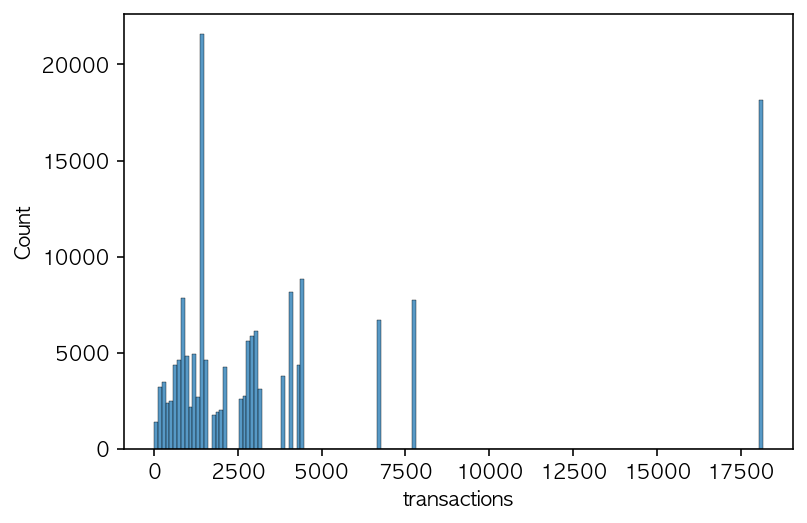

In [1320]:
sns.histplot(df['transactions'])

<AxesSubplot:xlabel='transactions', ylabel='Count'>

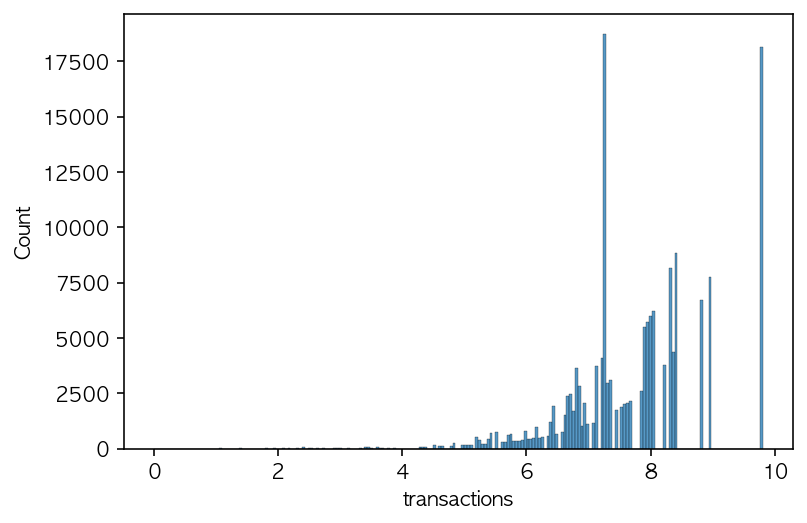

In [1321]:
sns.histplot(np.log(df['transactions']))

### review

<AxesSubplot:xlabel='review', ylabel='Count'>

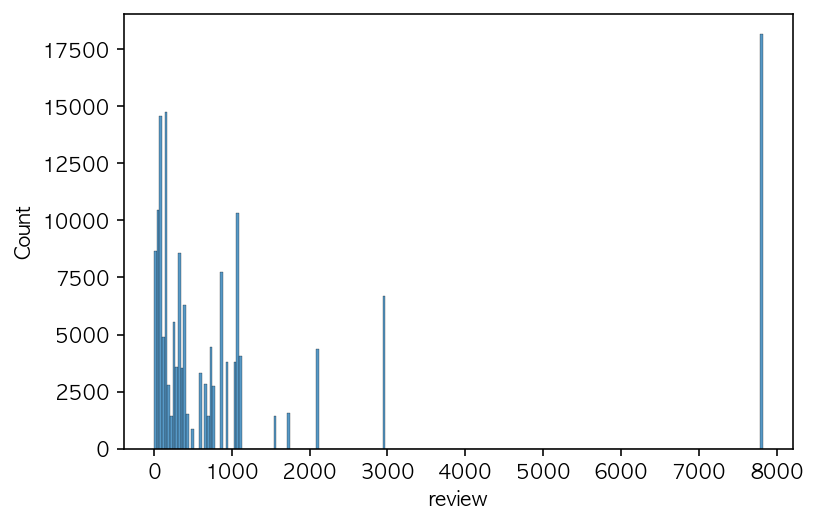

In [1322]:
sns.histplot(df['review'])

<AxesSubplot:xlabel='review', ylabel='Count'>

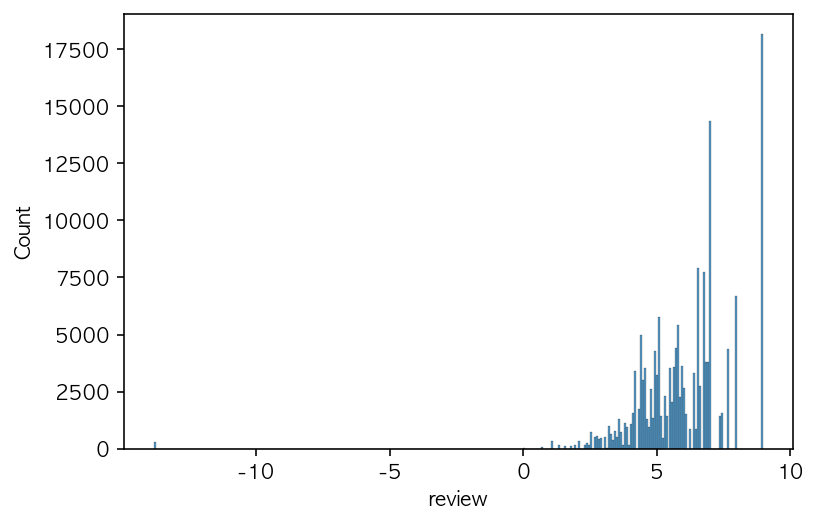

In [1323]:
sns.histplot(np.log(df['review'] + 0.000001))

In [1324]:
df['review_log'] = np.log(df['review'] + 0.000001)

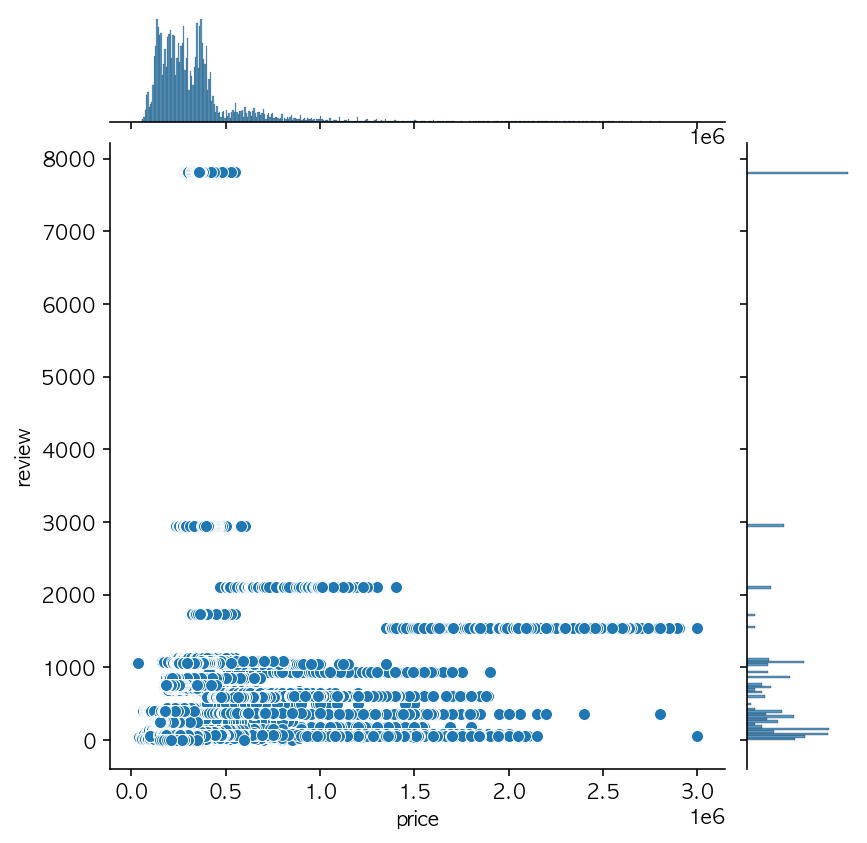

In [1325]:
sns.jointplot( df['price'], df['review'])
plt.show()

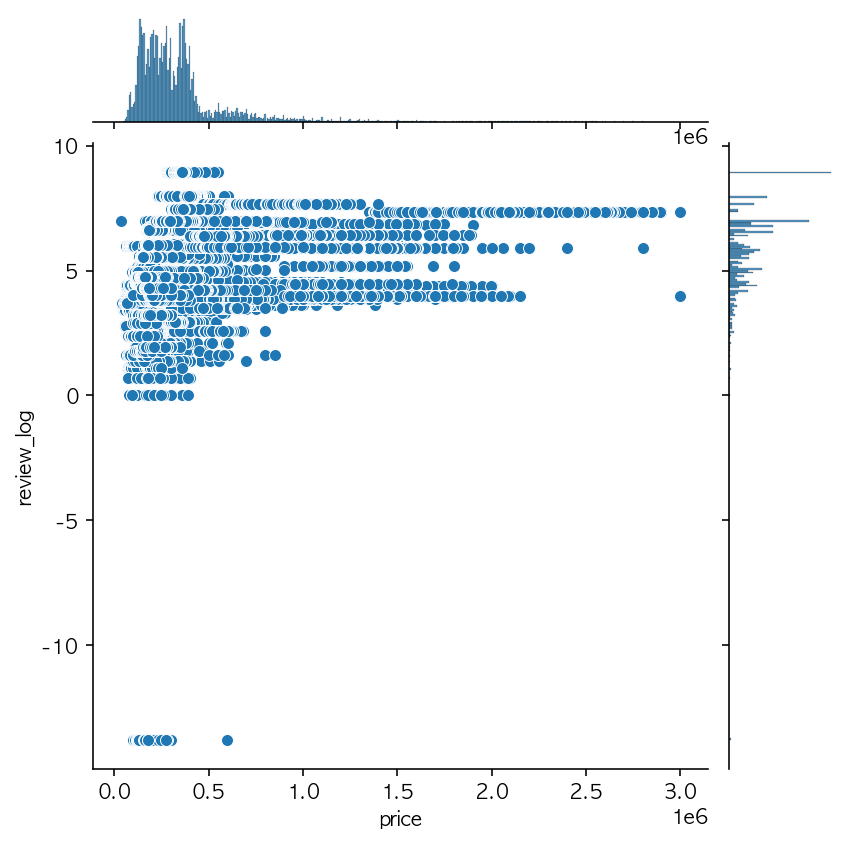

In [1326]:
sns.jointplot( df['price'], df['review_log'])
plt.show()

In [1327]:
df[['review_log', 'review']]

,review_log,review
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
164127,2,7
164128,2,7
164129,2,7
164130,2,7


In [1328]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1


### wish

<AxesSubplot:xlabel='wish', ylabel='Count'>

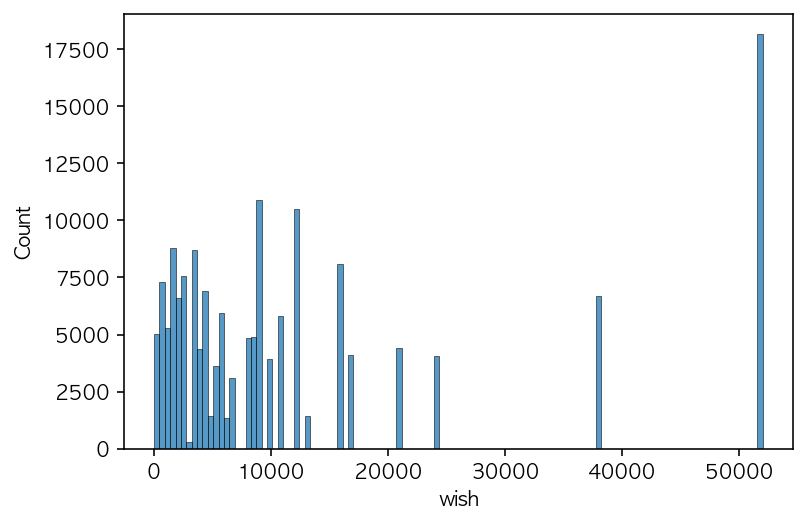

In [1329]:
sns.histplot(df['wish'])

<AxesSubplot:xlabel='wish', ylabel='Count'>

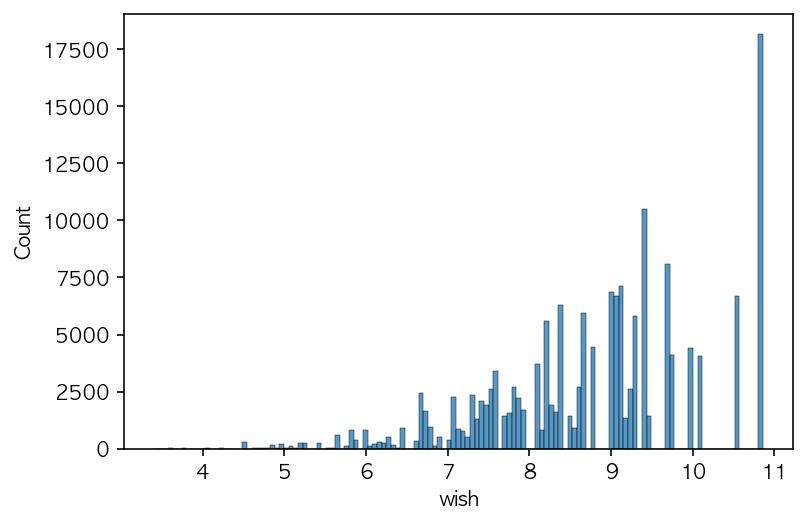

In [1330]:
sns.histplot(np.log(df['wish'] + 0.000001))

In [1331]:
df['wish_log'] = np.log(df['wish'] + 0.000001)

In [1332]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5


### date
- min_date 추가
- max_date 추가

In [1333]:
# min_max_date = pd.pivot_table(df, index='product', values='date', aggfunc=(min, max))

In [1334]:
# min_max_date = pd.DataFrame({'product': min_max_date.index, 'start_date': min_max_date['min'], 'end_date': min_max_date['max']}).reset_index(drop=True)

In [1335]:
# min_max_date

In [1336]:
# df = pd.merge(df, min_max_date, how='left', on='product')

In [1337]:
# df['start_date']

In [1338]:
# df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]['product'].value_counts()

In [1339]:
# df[df['product'] == 'Nike Dunk Low Triple White']

In [1340]:
# df = df[(df['start_date'] <= '2021-01') & (df['end_date'] >= '2021-12')]

In [1341]:
# df.reset_index(drop=True, inplace=True)

### release_price

In [1342]:
df['release_price'].value_counts().sort_index()

59000      1622
59300        10
59400        23
65000        90
69000       712
72400         8
74000         4
77100        28
77200        11
79000      6027
83000        92
85000       219
85800         3
99000      9641
100800      333
101000       40
106800       70
109000     1564
112700      509
115000       33
118600     3937
118800       30
119000    90706
124900        8
129000    29912
130500     2148
130700        5
139000      183
142400      417
142600       31
143300       10
146100       32
147400      229
147600       79
149000      634
160200       20
160900     1875
179000     2281
186000       30
186300       30
213600      573
213900        6
219000     9500
227200      417
Name: release_price, dtype: int64

In [1343]:
print(df.shape)
df.head()

(164132, 16)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5
3,275,129000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5
4,240,132000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5


In [1344]:
df[100:150]

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log
100,230,236000,2021-12-08,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
101,270,240000,2021-12-09,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
102,270,245000,2021-12-09,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
103,270,259000,2021-12-09,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
104,245,201000,2021-12-09,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
105,285,315000,2021-12-10,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
106,265,230000,2021-12-11,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
107,275,210000,2021-12-11,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
108,260,200000,2021-12-11,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7
109,225,220000,2021-12-11,(W) Nike Dunk Low Disrupt Carbon Green,2021-10-21,SUMMITWHITE/CARBONGREEN,147400,Nike,Nike Dunk,43903,1290,10,106,Low,2,7


<AxesSubplot:xlabel='release_price', ylabel='Count'>

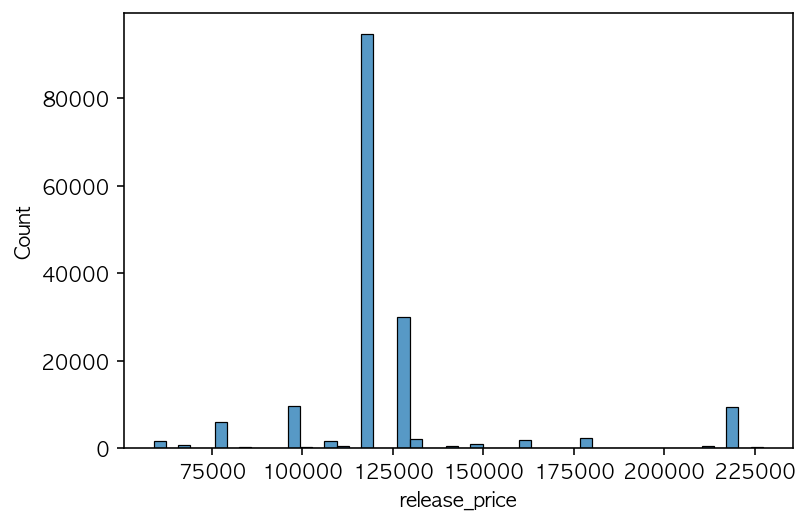

In [1345]:
sns.histplot(df['release_price'], bins=50)

### size
- size_target 컬럼 생성
- size_type 컬럼 생성

In [1346]:
# GS : grade school 초등학생 사이즈
# PS : Pre school 미취학 아동 사이즈
# TD : Toddler 유야용 사이즈
# W : Womans 여성 사이즈

In [1347]:
df.loc[(df['product'].str.contains('(GS)',regex = False)) | (df['product'].str.contains('(W)',regex = False)), 'size_target'] = 'Female'
df.loc[(df['product'].str.contains('(PS)',regex = False)) | (df['product'].str.contains('(TD)',regex = False)), 'size_target'] = 'Kids'

In [1348]:
df.loc[(df['size_target'] != 'Female') & (df['size_target'] != 'Kids'), 'size_target'] = 'Male'

In [1349]:
df[['product', 'size_target']].value_counts()

product                                size_target
Nike Dunk Low Retro Black              Male           18150
Nike Dunk Low SE Seoul                 Male            7758
(W) Nike Dunk Low Black                Female          6700
Nike Dunk Low Retro University Blue    Male            4450
(W) Nike Dunk Low Light Bone           Female          4400
                                                      ...  
(W) Nike Dunk Low Disrupt Barely Rose  Female             3
(PS) Nike Dunk Low UNLV                Kids               3
(W) Nike Dunk Low Disrupt Supa         Female             2
Nike Dunk SB Low Gulf of Mexico        Male               1
(GS) Nike Dunk Low Ueno Panda          Female             1
Length: 170, dtype: int64

In [1350]:
df.loc[(df['product'].str.contains('(GS)',regex = False)), 'size_type'] = 'GS'
df.loc[(df['product'].str.contains('(W)',regex = False)), 'size_type'] = 'W'
df.loc[(df['product'].str.contains('(PS)',regex = False)), 'size_type'] = 'PS'
df.loc[(df['product'].str.contains('(TD)',regex = False)), 'size_type'] = 'TD'
df.loc[df['size_target'] == 'Male', 'size_type'] = 'M'

In [1351]:
df[['product', 'size_type']].value_counts().head(20)

product                                    size_type
Nike Dunk Low Retro Black                  M            18150
Nike Dunk Low SE Seoul                     M             7758
(W) Nike Dunk Low Black                    W             6700
Nike Dunk Low Retro University Blue        M             4450
(W) Nike Dunk Low Light Bone               W             4400
Nike x Kasina Dunk Low 80's Bus            M             4345
(GS) Nike Dunk Low Black                   GS            4100
Nike Dunk Low Retro Varsity Green          M             4050
Nike x Off-White Dunk Low The 50 - Lot 18  M             3800
Nike Dunk Low Retro Medium Grey            M             3107
Nike x Off-White Dunk Low The 50 - Lot 46  M             3100
Nike Dunk Low Retro Championship Red       M             3000
(PS) Nike Dunk Low Black                   PS            2985
Nike SB Dunk Low Pro Chicago               M             2900
(W) Nike Dunk Low Next Nature Pale Coral   W             2837
(W) Nike Dunk Low

In [1352]:
df[['size_target', 'size_type', 'product', 'size']]

,size_target,size_type,product,size
0,Female,W,(W) Nike Dunk Low SE Primal Black,245
1,Female,W,(W) Nike Dunk Low SE Primal Black,240
2,Female,W,(W) Nike Dunk Low SE Primal Black,245
3,Female,W,(W) Nike Dunk Low SE Primal Black,275
4,Female,W,(W) Nike Dunk Low SE Primal Black,240
...,...,...,...,...
164127,Female,W,(W) Nike Dunk Low Golden Gals Metallic Silver,245
164128,Female,W,(W) Nike Dunk Low Golden Gals Metallic Silver,265
164129,Female,W,(W) Nike Dunk Low Golden Gals Metallic Silver,260
164130,Female,W,(W) Nike Dunk Low Golden Gals Metallic Silver,250


<AxesSubplot:xlabel='size', ylabel='Count'>

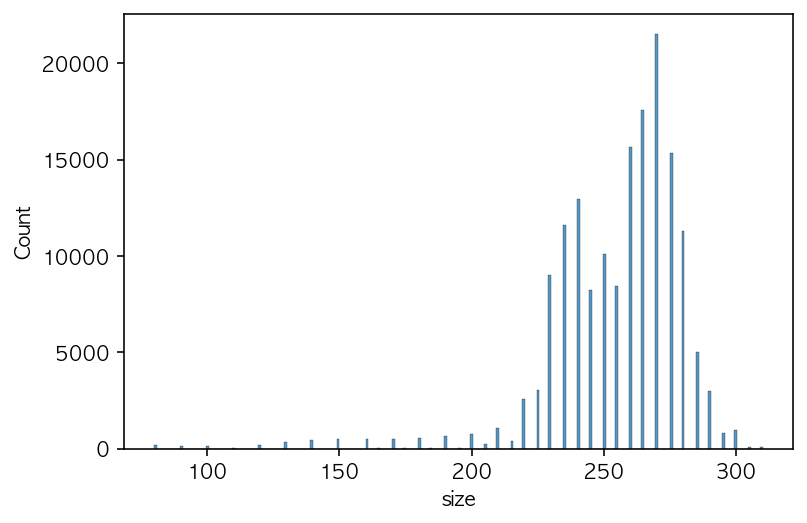

In [1353]:
sns.histplot(df['size'])

### color
- color1, color2, color3, color4 추가
- color_count 추가
- multicolor 컬럼 추가
- 색상은 price가 아닌 transactions와 연관이 있어보임.

In [1354]:
df['color_count'] = df['color'].apply(lambda x : len(x.split('/')))

In [1355]:
df['color_count'].value_counts()

2    138062
3     20620
4      5108
1       342
Name: color_count, dtype: int64

In [1356]:
pd.pivot_table(df, index='color_count', values='price', aggfunc='mean')

,price
color_count,
1,219620
2,359661
3,267003
4,281055


In [1357]:
# 트리플 화이트 = 단색
# df[df['color'] == 'WHITE/WHITE/WHITE']

In [1358]:
# df[df['color'] == 'BLACK/WHITE-RED-BLUE']

In [1359]:
# df[df['color'] == 'WHITE/MULTI-COLOR/WHITE']

In [1360]:
# multicolor가 아닌 것은 가격대가 낮다
df.loc[df['color_count']==1, 'multicolor'] = False
df.loc[df['color_count']!=1, 'multicolor'] = True
df.loc[df['color'] == 'WHITE/WHITE/WHITE', 'multicolor'] = False

In [1361]:
df['multicolor'].value_counts()

True     161023
False      3109
Name: multicolor, dtype: int64

In [1362]:
pd.pivot_table(df, index='multicolor', values='price', aggfunc='median')

,price
multicolor,
False,129000
True,285000


In [1363]:
df[df['color_count']==3]['color'].value_counts().head(50)

WHITE/TEAMGREEN/ORANGE              4050
MEDIUMGREY/VARSITYRED/WHITE         3118
WHITE/WHITE/WHITE                   2767
BLUEVOID/GREYFOG/WHITE              2081
SAIL/MEDIUMCURRY/FOSSIL             2000
SAIL/COAST/UNIVERSITYGOLD           1550
WHITE/PHOTONDUST/WHITE              1449
WHITE/GREENGLOW/SUNSETPULSE         1417
BLACK/PUREPLATINUM/ANTHRACITE        631
NAVY/UNIVERSITYGOLD/GYMRED           483
MIDASGOLD/TOUGHRED/WHITE             385
WHITE/MULTI-COLOR/WHITE              250
SUMMITWHITE/DESERTSAND/GHOSTSAIL     208
WHITE/METALLICGOLD/BARKROOTBROWN     158
BLACK/MULTI-COLOR/BLACK               30
SUNSETPULSE/SILVER/PURPLEPULSE        15
WHITE/METALLICSILVER/WHITE            15
WHITE/WHITE/METALLICGOLD              13
Name: color, dtype: int64

In [1364]:
df[['product','color']].value_counts().head(10)

product                                    color                             
Nike Dunk Low Retro Black                  WHITE/BLACK                           18150
Nike Dunk Low SE Seoul                     BLACK/WHITE-RED-BLUE                   7758
(W) Nike Dunk Low Black                    WHITE/BLACK                            6700
Nike Dunk Low Retro University Blue        WHITE/UNIVERSITYBLUE-WHITE             4450
(W) Nike Dunk Low Light Bone               SAIL/LIGHTBONE-CASHMERE                4400
Nike x Kasina Dunk Low 80's Bus            SAIL/UNIVERSITYGOLD-INDUSTRIALBLUE     4345
(GS) Nike Dunk Low Black                   WHITE/BLACK                            4100
Nike Dunk Low Retro Varsity Green          WHITE/TEAMGREEN/ORANGE                 4050
Nike x Off-White Dunk Low The 50 - Lot 18  SAIL/NEUTRALGREY                       3800
Nike Dunk Low Retro Medium Grey            MEDIUMGREY/VARSITYRED/WHITE            3107
dtype: int64

In [1365]:
def color_slash(x):
    if x.count('/') == 0:
        return x + '///'
    elif x.count('/') == 1:
        return x + '//'
    elif x.count('/') == 2:
        return x + '/'
    elif x.count('/') == 3:
        return x

In [1366]:
df['color_list'] = df['color'].apply(color_slash).apply(lambda x : x.split('/'))

In [1367]:
df.head(3)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color_list
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,"[BLACK, MULTI-COLOR, BLACK, ]"
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,"[BLACK, MULTI-COLOR, BLACK, ]"
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,"[BLACK, MULTI-COLOR, BLACK, ]"


In [1368]:
df['color_list'].apply(lambda x: len(x)).value_counts()

4    164132
Name: color_list, dtype: int64

In [1369]:
df['color1'] = df['color_list'].apply(lambda x : x[0])
df['color2'] = df['color_list'].apply(lambda x : x[1])
df['color3'] = df['color_list'].apply(lambda x : x[2])
df['color4'] = df['color_list'].apply(lambda x : x[3])

In [1370]:
df = df.drop(['color_list'], axis=1)

### Collabo
- Collabo 컬럼 생성
- Collabo_brand 컬럼 생성
- Collabo_class 컬럼 생성

In [1371]:
df['product'].value_counts()

Nike Dunk Low Retro Black                18150
Nike Dunk Low SE Seoul                    7758
(W) Nike Dunk Low Black                   6700
Nike Dunk Low Retro University Blue       4450
(W) Nike Dunk Low Light Bone              4400
                                         ...  
(W) Nike Dunk Low Disrupt Barely Rose        3
(PS) Nike Dunk Low UNLV                      3
(W) Nike Dunk Low Disrupt Supa               2
Nike Dunk SB Low Gulf of Mexico              1
(GS) Nike Dunk Low Ueno Panda                1
Name: product, Length: 170, dtype: int64

In [1372]:
df['Collabo'] = df['product'].str.contains(' x ', regex=False)

In [1373]:
df['Collabo'].value_counts()

False    139292
True      24840
Name: Collabo, dtype: int64

In [1374]:
pd.set_option('display.float_format','{:.0f}'.format)

In [1375]:
pd.pivot_table(df[df['Collabo']==True], index=['product'], values='price', aggfunc='mean').sort_values(by='price', ascending=False)

,price
product,
Nike x Travis Scott SB Dunk Low,2093267
Nike x Supreme SB Dunk Low Barkroot Brown,1446633
Nike x Off-White Dunk Low The 50 - Lot 1,1330911
Nike x StrangeLove SB Dunk Low Pink (Regular Box),1313798
Nike x Frame Skate SB Dunk Low Pro Habibi,1245188
Nike x Off-White Dunk Low The 50 - Lot 50,1075585
Nike x Kasina Dunk Low Road Sign - Kasina Exclusive,1023193
Nike x Off-White Dunk Low Pine Green,909133
Nike x Kasina Dunk Low 80's Bus,782716


In [1376]:
df.loc[df['Collabo'] ,['product','Collabo']].value_counts()

product                                                  Collabo
Nike x Kasina Dunk Low 80's Bus                          True       4345
Nike x Off-White Dunk Low The 50 - Lot 18                True       3800
Nike x Off-White Dunk Low The 50 - Lot 46                True       3100
Nike x Kasina Dunk Low Road Sign - Kasina Exclusive      True       1900
Nike x Travis Scott SB Dunk Low                          True       1450
Nike x Parra SB Dunk Low Pro Abstract Art                True       1450
Nike x NBA Dunk Low Retro EMB Nets                       True       1350
Nike x NBA Dunk Low Retro EMB Chicago                    True       1006
Nike x Off-White Dunk Low Pine Green                     True        905
Nike x Off-White Dunk Low University Red                 True        853
Nike x Off-White Dunk Low University Gold Midnight Navy  True        842
(GS) Nike x NBA Dunk Low Chicago                         True        800
(GS) Nike x NBA Dunk Low Nets                            Tr

In [1377]:
df.loc[df['Collabo']==True, 'product'][6162].find('SB') != -1

True

In [1378]:
def extract_collabo(x):
    if x.find('SB') != -1:
        r1 = x.find('Nike')
        r2 = x.find('SB')
        return x[r1+7:r2-1]
    elif x.find('SB') == -1:
        r1 = x.find('Nike')
        r2 = x.find('Dunk')
        return x[r1+7:r2-1]

In [1379]:
df.loc[df['Collabo']==True, 'product'].apply(extract_collabo).value_counts()

Off-White        10496
Kasina            6245
NBA               3887
Parra             1450
Travis Scott      1450
StrangeLove        526
Frame Skate        483
Supreme            158
Quartersnacks      145
Name: product, dtype: int64

In [1380]:
df['Collabo_brand'] = df.loc[df['Collabo']==True, 'product'].apply(extract_collabo)

In [1381]:
df.loc[df['Collabo']==False, 'Collabo_brand'] = 'None'

In [1382]:
df.loc[df['Collabo']==True]

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand
6162,270,410000,2021-09-01,Nike x Quartersnacks SB Dunk Low Zebra Cake,2021-09-01,BLACK/WHITE,129000,Nike,Nike Dunk,39064,783,26,145,Low,3,7,Male,M,2,True,BLACK,WHITE,,,True,Quartersnacks
6163,260,400000,2021-09-01,Nike x Quartersnacks SB Dunk Low Zebra Cake,2021-09-01,BLACK/WHITE,129000,Nike,Nike Dunk,39064,783,26,145,Low,3,7,Male,M,2,True,BLACK,WHITE,,,True,Quartersnacks
6164,260,300000,2021-09-01,Nike x Quartersnacks SB Dunk Low Zebra Cake,2021-09-01,BLACK/WHITE,129000,Nike,Nike Dunk,39064,783,26,145,Low,3,7,Male,M,2,True,BLACK,WHITE,,,True,Quartersnacks
6165,260,300000,2021-09-01,Nike x Quartersnacks SB Dunk Low Zebra Cake,2021-09-01,BLACK/WHITE,129000,Nike,Nike Dunk,39064,783,26,145,Low,3,7,Male,M,2,True,BLACK,WHITE,,,True,Quartersnacks
6166,270,330000,2021-09-01,Nike x Quartersnacks SB Dunk Low Zebra Cake,2021-09-01,BLACK/WHITE,129000,Nike,Nike Dunk,39064,783,26,145,Low,3,7,Male,M,2,True,BLACK,WHITE,,,True,Quartersnacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160304,260,900000,2021-12-15,Nike x Supreme SB Dunk Low Barkroot Brown,2021-03-04,WHITE/METALLICGOLD/BARKROOTBROWN,130500,Nike,Nike Dunk,30613,541,54,158,Low,4,6,Male,M,3,True,WHITE,METALLICGOLD,BARKROOTBROWN,,True,Supreme
160305,270,950000,2021-12-16,Nike x Supreme SB Dunk Low Barkroot Brown,2021-03-04,WHITE/METALLICGOLD/BARKROOTBROWN,130500,Nike,Nike Dunk,30613,541,54,158,Low,4,6,Male,M,3,True,WHITE,METALLICGOLD,BARKROOTBROWN,,True,Supreme
160306,260,919000,2021-12-21,Nike x Supreme SB Dunk Low Barkroot Brown,2021-03-04,WHITE/METALLICGOLD/BARKROOTBROWN,130500,Nike,Nike Dunk,30613,541,54,158,Low,4,6,Male,M,3,True,WHITE,METALLICGOLD,BARKROOTBROWN,,True,Supreme
160307,270,933000,2021-12-28,Nike x Supreme SB Dunk Low Barkroot Brown,2021-03-04,WHITE/METALLICGOLD/BARKROOTBROWN,130500,Nike,Nike Dunk,30613,541,54,158,Low,4,6,Male,M,3,True,WHITE,METALLICGOLD,BARKROOTBROWN,,True,Supreme


In [1383]:
df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['product']

Series([], Name: product, dtype: object)

In [1384]:
df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand'] = 'S.P.O.T. x Lance Mountain'

In [1385]:
df[df['product'].str.contains('S.P.O.T. x Lance Mountain Dunk')]['Collabo_brand']

Series([], Name: Collabo_brand, dtype: object)

In [1386]:
df.groupby('Collabo_brand')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
Collabo_brand,,
NBA,254692,3887
None,277117,139292
Quartersnacks,313855,145
Parra,441431,1450
Off-White,618797,10496
Kasina,855879,6245
Frame Skate,1245188,483
StrangeLove,1313798,526
Supreme,1446633,158


In [1387]:
df.loc[df['Collabo_brand'] == 'Off-White'].groupby('product')['price'].agg(['mean', 'count']).sort_values(by='mean')

,mean,count
product,,
Nike x Off-White Dunk Low The 50 - Lot 46,440160,3100
Nike x Off-White Dunk Low The 50 - Lot 20,550222,99
Nike x Off-White Dunk Low The 50 - Lot 18,593514,3800
Nike x Off-White Dunk Low University Red,617932,853
Nike x Off-White Dunk Low The 50 - Lot 31,646667,6
Nike x Off-White Dunk Low University Gold Midnight Navy,654571,842
Nike x Off-White Dunk Low The 50 - Lot 49,678877,318
Nike x Off-White Dunk Low Pine Green,909133,905
Nike x Off-White Dunk Low The 50 - Lot 50,1075585,246


In [1388]:
# # 브랜드 카테고리 분류 (기준을 정확히 잡아야 함)
# def make_class(x):
#     if x in ['NBA', 'Quartersnacks', 'Parra']:
#         return 'Normal'
#     elif x in ['Off-White', 'Kasina']:
#         return 'Preminum'
#     elif x in ['Frame Skate', 'StrangeLove', 'Supreme', 'Travis Scott']:
#         return 'Highend'
#     else:
#         return 'None'

In [1389]:
# df.loc[df['Collabo_brand'].apply(make_class) == 'Normal', 'Collabo_class'] = 'Normal'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Preminum', 'Collabo_class'] = 'Preminum'
# df.loc[df['Collabo_brand'].apply(make_class) == 'Highend', 'Collabo_class'] = 'Highend'
# df.loc[df['Collabo_brand'].apply(make_class) == 'None', 'Collabo_class'] = 'None'

In [1390]:
# df[['product','Collabo_brand', 'Collabo_class']].value_counts()

### date
- after_day 컬럼 생성
- date, release_date : unix 타임스탬프 형식으로 변환

In [1391]:
df['date']

0         2021-09-30
1         2021-09-30
2         2021-10-01
3         2021-10-04
4         2021-10-04
             ...    
164127    2021-12-30
164128    2021-12-30
164129    2021-12-30
164130    2021-12-30
164131    2021-12-30
Name: date, Length: 164132, dtype: object

In [1392]:
df['date'] = pd.to_datetime(df['date'])
df['release_date'] = pd.to_datetime(df['release_date'])

In [1393]:
print(df.shape)
df.head()

(164132, 26)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None
3,275,129000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None
4,240,132000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None


In [1394]:
df['after_day'] = df['date'] - df['release_date']

In [1395]:
df['after_day'] = df['after_day'].dt.days

In [1396]:
df

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day
0,245,125000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,-38
1,240,123000,2021-09-30,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,-38
2,245,129000,2021-10-01,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,-37
3,275,129000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,-34
4,240,132000,2021-10-04,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164127,245,236000,2021-12-30,(W) Nike Dunk Low Golden Gals Metallic Silver,2021-12-10,SILVER/WHITE-BLACK,130500,Nike,Nike Dunk,44568,628,7,48,Low,2,6,Female,W,2,True,SILVER,WHITE-BLACK,,,False,None,20
164128,265,239000,2021-12-30,(W) Nike Dunk Low Golden Gals Metallic Silver,2021-12-10,SILVER/WHITE-BLACK,130500,Nike,Nike Dunk,44568,628,7,48,Low,2,6,Female,W,2,True,SILVER,WHITE-BLACK,,,False,None,20
164129,260,269000,2021-12-30,(W) Nike Dunk Low Golden Gals Metallic Silver,2021-12-10,SILVER/WHITE-BLACK,130500,Nike,Nike Dunk,44568,628,7,48,Low,2,6,Female,W,2,True,SILVER,WHITE-BLACK,,,False,None,20
164130,250,270000,2021-12-30,(W) Nike Dunk Low Golden Gals Metallic Silver,2021-12-10,SILVER/WHITE-BLACK,130500,Nike,Nike Dunk,44568,628,7,48,Low,2,6,Female,W,2,True,SILVER,WHITE-BLACK,,,False,None,20


In [1397]:
# after_day >= 0 만 선택
df = df[df['after_day'] >= 1]

<AxesSubplot:xlabel='after_day', ylabel='Count'>

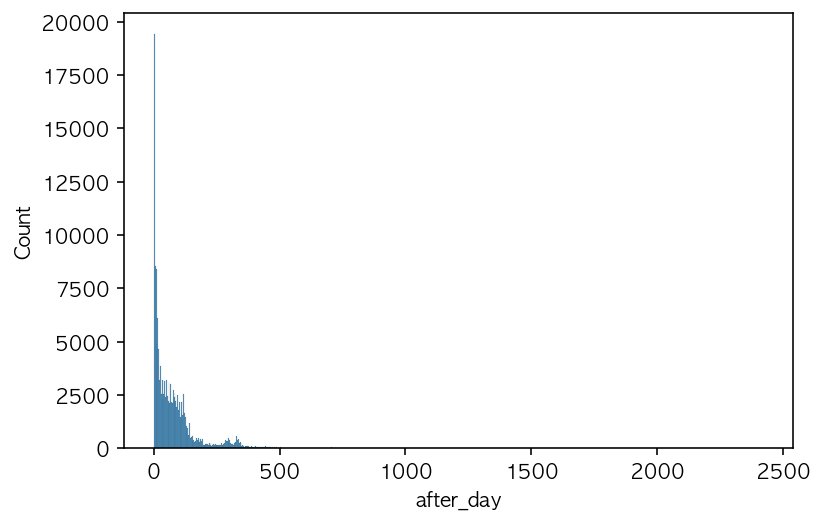

In [1398]:
sns.histplot(df['after_day'])

<AxesSubplot:xlabel='after_day', ylabel='Count'>

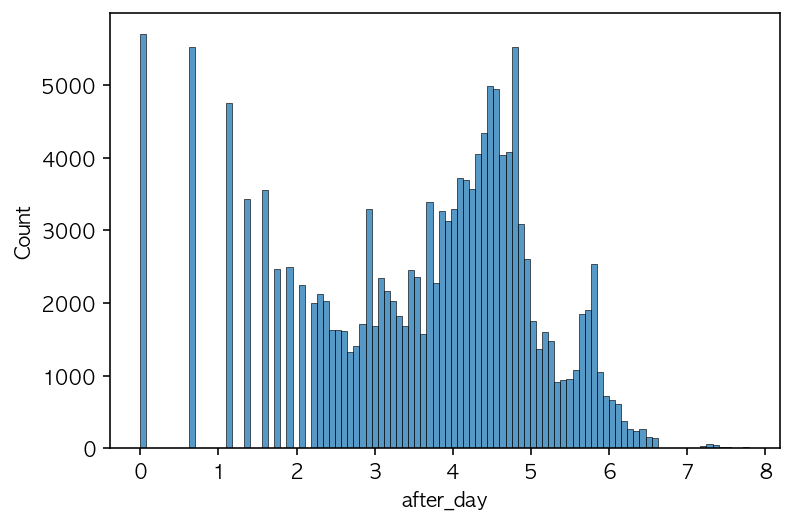

In [1399]:
sns.histplot(np.log(df['after_day']+0.000001))

In [1400]:
df['after_day_log'] = np.log(df['after_day'] + 0.000001)

In [1401]:
df[df['after_day'] == 0].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

Series([], Name: price, dtype: int64)

In [1402]:
df[df['after_day'] == 1].groupby('product')['price'].mean().sort_values(ascending=False).head(5)

product
Nike x Kasina Dunk Low Road Sign - Kasina Exclusive   1511909
Nike SB Dunk Low Pro Chicago                          1205000
Nike SB Dunk Low Pro Street Hawker                    1194429
Nike SB Dunk Low What The Paul                         760459
Nike SB Dunk Low Pro Clear Jade                        701000
Name: price, dtype: float64

In [1403]:
import datetime as dt
# 유닉스 타임스탬프로 바꾸기
df['date_unix'] = df['date'].map(dt.datetime.toordinal)
df['release_date_unix'] = df['release_date'].map(dt.datetime.toordinal)

### Correlation

In [1404]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
18,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,7,2,738108,738101


In [1405]:
heatmap_data = df[["price", "size", "date", "release_date", "release_price", "wish", "review", "transactions", 'after_day', 'Collabo', 'color_count', 'multicolor', 'review_log', 'wish_log', 'after_day_log']]

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

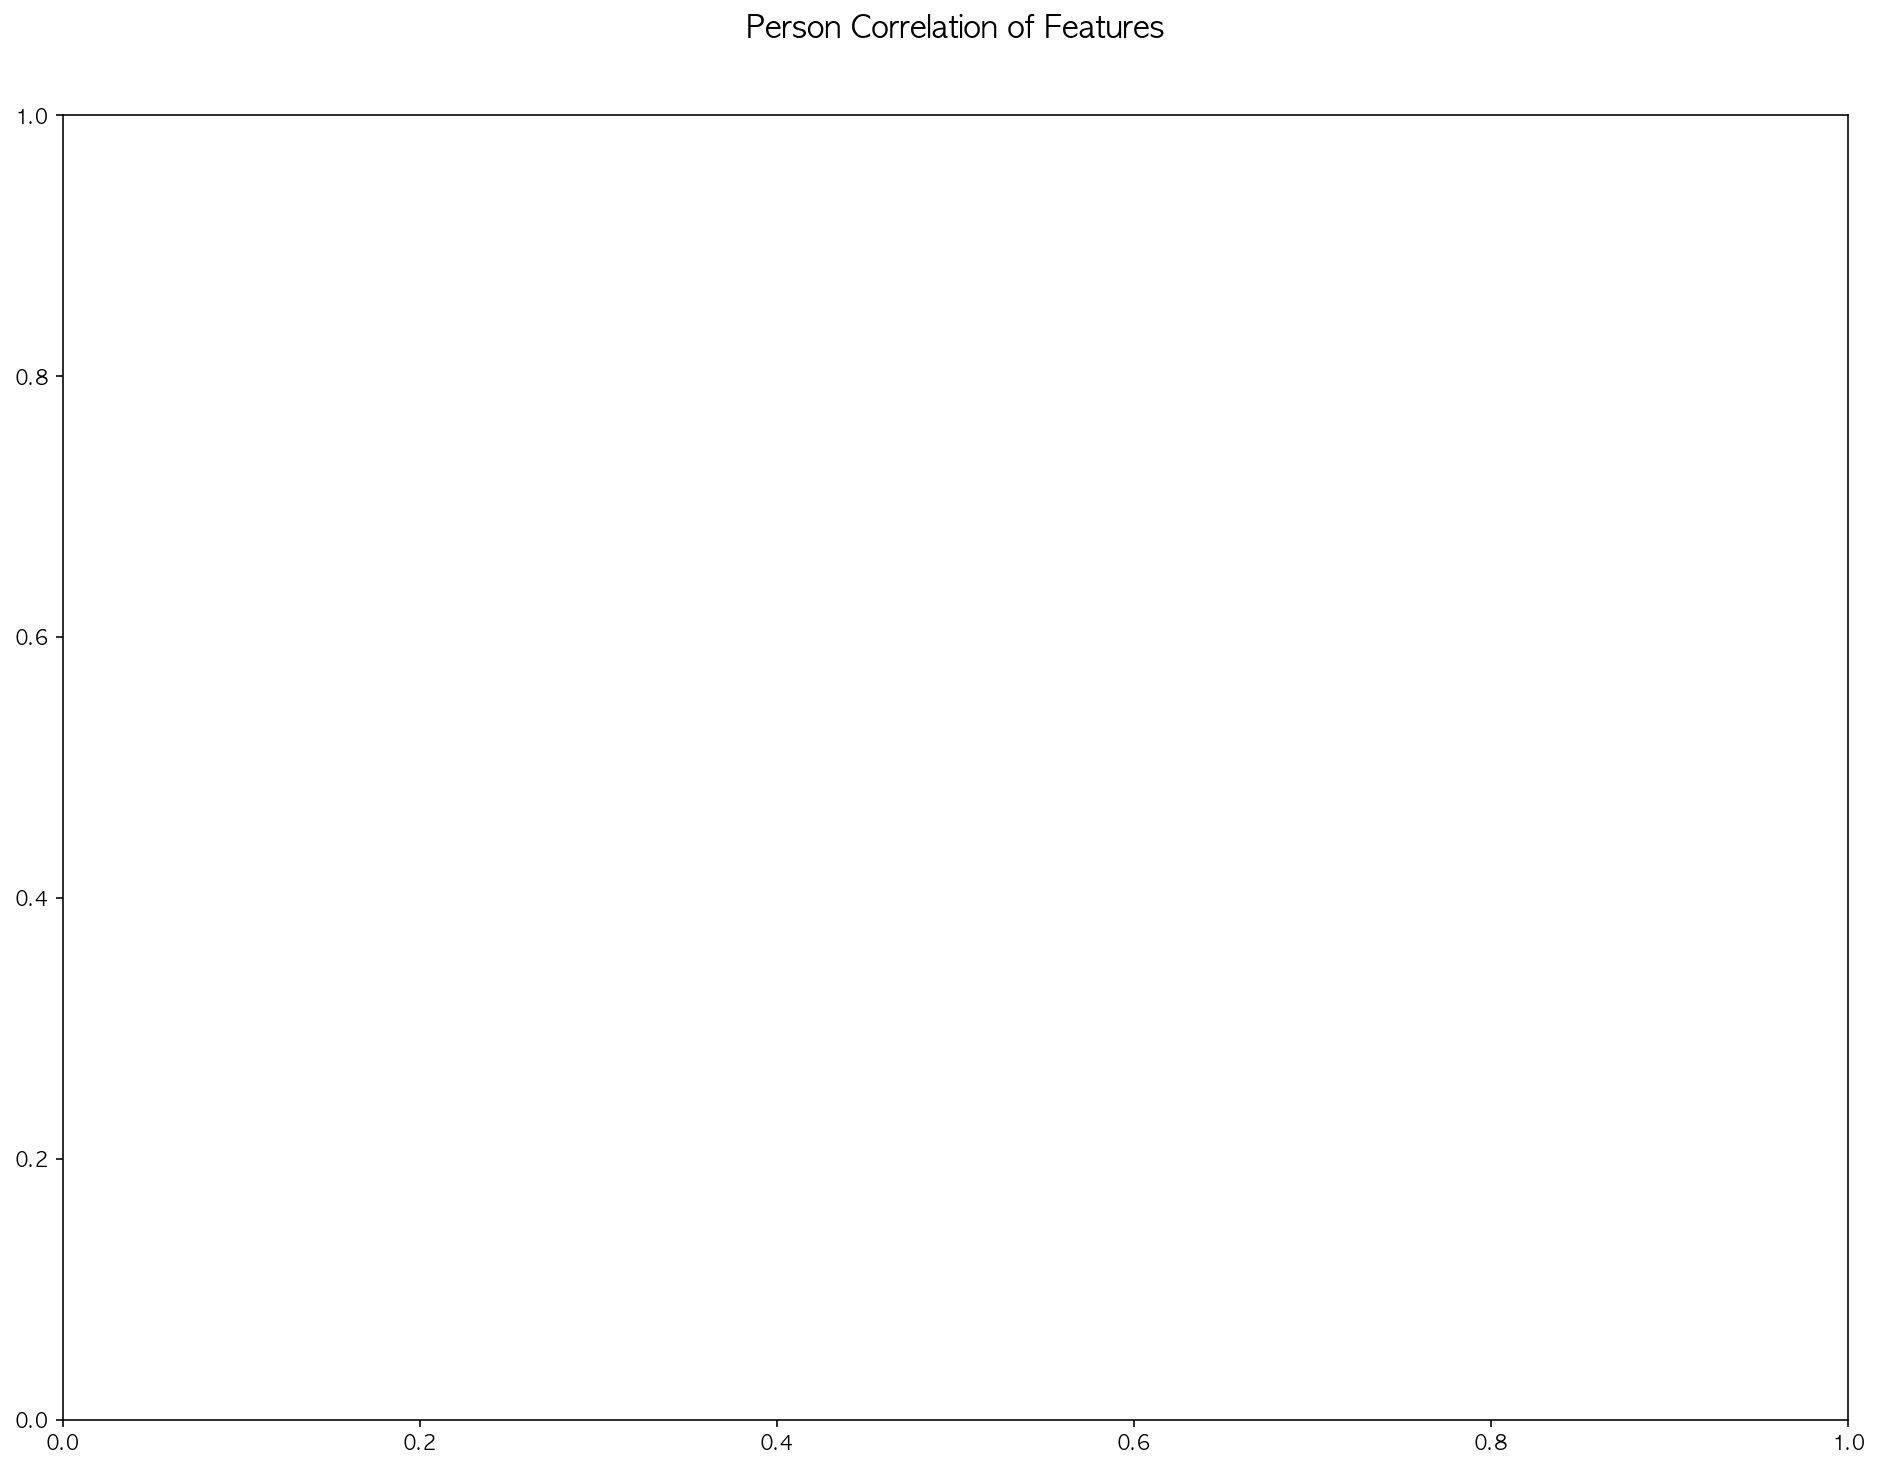

In [1406]:
colormap = plt.cm.PuBu
plt.figure(figsize=(16, 12))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0
            , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

#### price (Target)

<AxesSubplot:xlabel='price', ylabel='Count'>

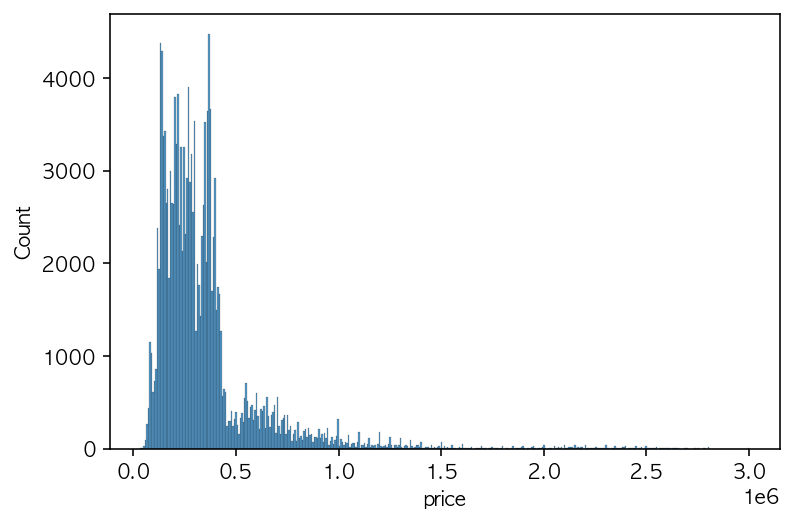

In [1407]:
sns.histplot(df['price'])

In [1408]:
df.describe()

,size,price,release_price,number,wish,review,transactions,review_log,wish_log,color_count,after_day,after_day_log,date_unix,release_date_unix
count,152072,152072,152072,152072,152072,152072,152072,152072,152072,152072,152072,152072,152072,152072
mean,255,349341,125753,32625,13359,1349,4188,6,9,2,82,4,737948,737866
std,25,278633,29582,6082,15346,2264,5034,2,1,0,113,2,139,166
min,80,34000,59000,4756,30,0,1,-14,3,1,1,0,737454,735581
25%,240,193000,119000,28029,3347,141,1250,5,8,2,13,3,737860,737794
50%,260,281000,119000,32655,8336,406,2750,6,9,2,50,4,737948,737906
75%,270,386000,129000,38844,16000,1078,4345,7,10,2,104,5,738066,738014
max,310,3000000,227200,47901,52000,7820,18150,9,11,4,2419,8,738154,738153


<AxesSubplot:xlabel='price', ylabel='Count'>

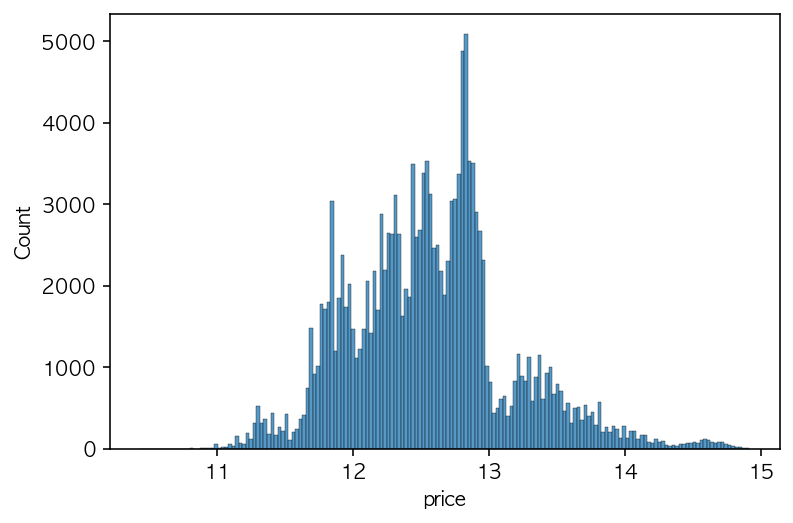

In [1409]:
sns.histplot(np.log(df['price']+0.000001))

In [1410]:
df.to_csv('data/nike_dunk_low(model).csv')

In [1411]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,type,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
18,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Low,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,None,7,2,738108,738101


In [1412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152072 entries, 18 to 164131
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   size               152072 non-null  int64         
 1   price              152072 non-null  int64         
 2   date               152072 non-null  datetime64[ns]
 3   product            152072 non-null  object        
 4   release_date       152072 non-null  datetime64[ns]
 5   color              152072 non-null  object        
 6   release_price      152072 non-null  int64         
 7   brand              152072 non-null  object        
 8   category           152072 non-null  object        
 9   number             152072 non-null  float64       
 10  wish               152072 non-null  float64       
 11  review             152072 non-null  float64       
 12  transactions       152072 non-null  int64         
 13  type               152072 non-null  object 

### Drop Duplicates
- 중복 제거 하지 않는 것이 성능이 더 높음.

In [1184]:
# df = df.drop_duplicates().reset_index(drop=True)

In [1185]:
print(df.shape)

(152072, 29)


## Preprocessing for Modeling

In [671]:
dataset = pd.get_dummies(df, columns = ['size_target', 'multicolor', 'Collabo_class'])

In [672]:
print(dataset.shape)
dataset.head()

(158192, 33)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,size_target_Female,size_target_Kids,size_target_Male,multicolor_False,multicolor_True,Collabo_class_Highend,Collabo_class_None,Collabo_class_Normal,Collabo_class_Preminum
16,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
17,250,119000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,1,0,0,0,1,0,1,0,0
18,235,124000,738108,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,7,1,0,0,0,1,0,1,0,0
19,255,149000,738112,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,11,1,0,0,0,1,0,1,0,0
20,240,120000,738118,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,1,5,W,3,BLACK,MULTI-COLOR,BLACK,,False,NaN,17,1,0,0,0,1,0,1,0,0


In [673]:
dataset.loc[dataset['Collabo'] == True, 'Collabo'] = 1
dataset.loc[dataset['Collabo'] == False, 'Collabo'] = 0

In [680]:
pd.set_option('display.float_format','{:.2f}'.format)
corr = dataset.corr()['price'].sort_values(ascending=False)

In [688]:
corr

price                     1.00
Collabo_class_Highend     0.66
release_price             0.46
Collabo_class_Preminum    0.45
size_target_Male          0.35
after_day                 0.29
size                      0.28
review_log                0.25
review                    0.11
multicolor_True           0.10
wish_log                  0.05
wish                      0.00
transactions              0.00
Collabo_class_Normal     -0.03
color_count              -0.10
multicolor_False         -0.10
size_target_Kids         -0.19
size_target_Female       -0.27
date                     -0.28
number                   -0.35
release_date             -0.44
Collabo_class_None       -0.60
Name: price, dtype: float64

In [687]:
columns = corr[:11].index

In [721]:
y_label = dataset['price']
# x_data = dataset.drop(['price', 'date', 'product', 'release_date', 'color', 'brand', 'category', 'number', 'color_count', 'color1', 'color2', 'color3', 'color4', 'Collabo', 'Collabo_brand', 'multicolor_True', 'multicolor_False'], axis=1)
x_data = dataset[columns].drop(['price','review'], axis=1)

In [722]:
print(x_data.shape)
x_data.head()

(158192, 9)


,Collabo_class_Highend,release_price,Collabo_class_Preminum,size_target_Male,after_day,size,review_log,multicolor_True,wish_log
16,0,129000,0,0,0,235,1.39,1,4.53
17,0,129000,0,0,0,250,1.39,1,4.53
18,0,129000,0,0,7,235,1.39,1,4.53
19,0,129000,0,0,11,255,1.39,1,4.53
20,0,129000,0,0,17,240,1.39,1,4.53


In [723]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [724]:
x_columns = x_data.columns

In [725]:
x_data = scaler.fit_transform(x_data)

In [726]:
print(x_data.shape)
x_data

(158192, 9)


array([[0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       [0.        , 0.41617122, 0.        , ..., 0.66733267, 1.        ,
        0.15170719],
       ...,
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687],
       [0.        , 0.42508918, 0.        , ..., 0.69189882, 1.        ,
        0.40780687]])

In [727]:
y_label = y_label.values.reshape(-1,1)

In [728]:
print(y_label.shape)
y_label

(158192, 1)


array([[125000],
       [119000],
       [124000],
       ...,
       [269000],
       [270000],
       [210000]])

In [729]:
# x_data.to_csv('data/X_data.csv', index=False)
# y_label.to_csv('data/y_label.csv', index=False)

In [730]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, train_size=0.8, random_state=45)

In [731]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(110734, 9) (47458, 9) (110734, 1) (47458, 1)


In [1056]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, train_size=0.7, random_state=45)

## Model Selection

- RandomForestRegressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- XGBRegressor : https://xgboost.readthedocs.io/en/stable/python/python_api.html
- LGBMRegressor
- CatBoostRegressor : https://catboost.ai/en/docs/concepts/python-reference_train

### 1. RandomForest

In [1057]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

In [1058]:
rfr = RandomForestRegressor()
# xgbr = XGBRegressor()
# lgbmr = LGBMRegressor()
# catr = CatBoostRegressor()
# # xgbr = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
# #                            colsample_bytree=1, max_depth=7)

In [1059]:
rfr.fit(X_train_val, y_train_val)
# xgbr.fit(X_train,y_train)
# lgbmr.fit(X_train, y_train)
# catr.fit(X_train, y_train)

RandomForestRegressor()

In [1060]:
from sklearn.metrics import mean_squared_error

rfr_pred = rfr.predict(X_test_val)
# xgbr_pred = xgbr.predict(X_test)
# lgbmr_pred = lgbmr.predict(X_test)
# catr_pred = catr.predict(X_test)

rfr_mse = mean_squared_error(y_test_val, rfr_pred)
# xgbr_mse = mean_squared_error(y_test, xgbr_pred)
# lgbmr_mse = mean_squared_error(y_test, lgbmr_pred)
# catr_mse = mean_squared_error(y_test, catr_pred)

rfr_rmse = np.sqrt(rfr_mse)
# xgbr_rmse = np.sqrt(xgbr_mse)
# lgbmr_rmse = np.sqrt(lgbmr_mse)
# catr_rmse = np.sqrt(catr_mse)

print(rfr_rmse)
# print(rfr_rmse, xgbr_rmse, lgbmr_rmse, catr_rmse)

21883.895708897653


In [1061]:
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(rfr_rmse)

21349.057169470372


In [1062]:
from sklearn.metrics import r2_score
r2_score(y_test, rfr_pred)

0.993887076143271

In [1064]:
print(1 - (1-rfr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

0.9968441158591359


In [737]:
X_train = pd.DataFrame(data = X_train, columns = x_columns)
y_train = pd.DataFrame(data = y_train, columns = ['price'])

In [738]:
index=rfr.feature_importances_.argsort()[::-1][0:-1]
index_imp=rfr.feature_importances_[index]
index_name=X_train.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

[('Collabo_class_Highend', 0.43398807733088735),
 ('Collabo_class_Preminum', 0.22939922641153962),
 ('review_log', 0.1324248508376564),
 ('release_price', 0.0647071670333954),
 ('after_day', 0.05577575553866152),
 ('wish_log', 0.04749870556515516),
 ('size_target_Male', 0.02232827250391282),
 ('size', 0.013563124235918572)]

Feature ranking:
1. feature Collabo_class_Highend (0.434)
2. feature Collabo_class_Preminum (0.229)
3. feature review (0.111)
4. feature release_price (0.059)
5. feature after_day (0.052)
6. feature wish (0.039)
7. feature transactions (0.039)
8. feature size_target_Male (0.022)
9. feature size (0.014)
10. feature Collabo_class_Normal (0.000)
11. feature Collabo_class_None (0.000)
12. feature size_target_Female (0.000)
13. feature size_target_Kids (0.000)


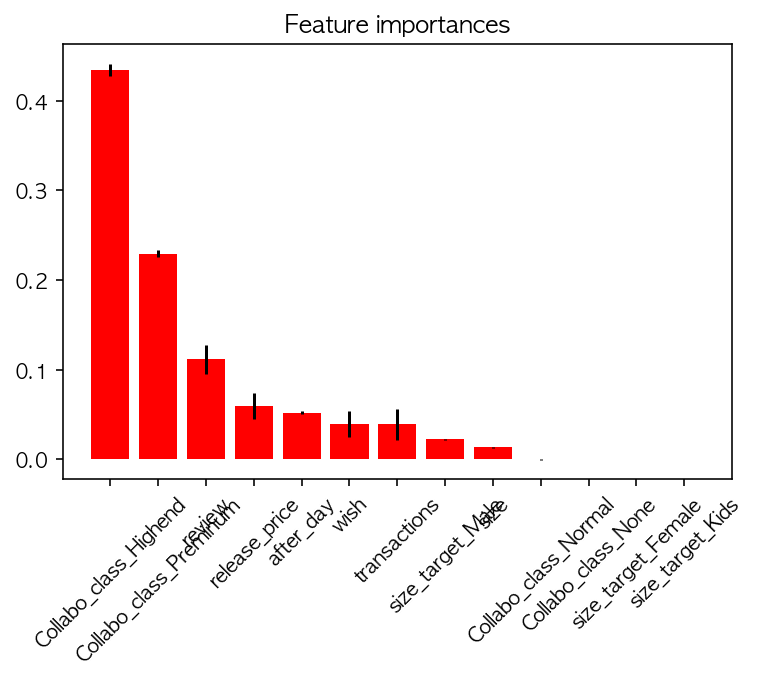

In [427]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [430]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,after_day,Collabo_class
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947.00,93.00,4.00,30,Female,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,0,None


### 2. CatBoost

In [527]:
df.head(1)

,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,Collabo,Collabo_brand,Collabo_class,after_day
0,235,125000,738101,(W) Nike Dunk Low SE Primal Black,738101,BLACK/MULTI-COLOR/BLACK,129000,Nike,Nike Dunk,41947,93,4,30,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,,False,NaN,None,0


In [ ]:
from catboost import CatBoostRegressor

cat_features = []
X_train = 
y_train

### Featurn Selection
- https://data-newbie.tistory.com/608

In [ ]:
from BorutaShap import BorutaShap, load_data

X, y = load_data(data_type='regression')
X.head()
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(X_size=12, figsize=(19,8),
                      y_scale='log', which_features='all',)

In [ ]:
if self.importance_measure == 'shap':

self.explain()
vals = self.shap_values

if normalize:
vals = self.calculate_Zscore(vals)

X_feature_import = vals[:len(self.X.columns)]
Shadow_feature_import = vals[len(self.X_shadow.columns):]


elif self.importance_measure == 'gini':

feature_importances_ =  np.abs(self.model.feature_importances_)

if normalize:
feature_importances_ = self.calculate_Zscore(feature_importances_)

X_feature_import = feature_importances_[:len(self.X.columns)]
Shadow_feature_import = feature_importances_[len(self.X.columns):]

else:

raise ValueError('No Importance_measure was specified select one of (shap, gini)')

## 하이퍼파라미터 튜닝

In [1357]:
dataset['release_price'].mean()

125574.04103873773

In [1356]:
dataset['price'].median()

280000.0

### 1. Grid Search
- https://www.kaggle.com/jayatou/xgbregressor-with-gridsearchcv

In [1354]:
# RF
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [1359]:
pred = grid_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

46991.65224387363

In [1207]:
# XGB
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgbr = XGBRegressor()
xgb_grid = GridSearchCV(xgbr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_data, y_label)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


KeyboardInterrupt: 

In [1205]:
r_sq = xgbr.score(X_train, y_train)
print(r_sq)

0.9859814866931647


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

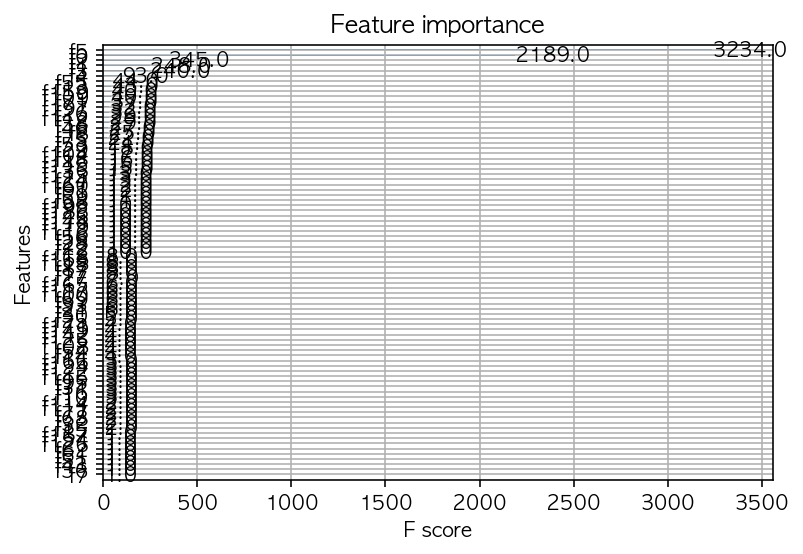

In [1141]:
xgboost.plot_importance(xgbr)

### 2. Optuna 활용
- 출처 : https://www.kaggle.com/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna
- 매우 오래걸리네..

In [ ]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['mse', 'mae'])
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 10000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    
    regr = RandomForestRegressor(bootstrap = bootstrap, criterion = criterion,
                                 max_depth = max_depth, max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2)
    
    
    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)
    
    score = cross_val_score(regr, X_train, y_train, cv=5, scoring="r2")
    r2_mean = score.mean()

    return r2_mean

In [ ]:
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

#Create an instance with tuned hyperparameters
optimised_rf = RandomForestRegressor(bootstrap = study.best_params['bootstrap'], criterion = study.best_params['criterion'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     max_leaf_nodes = study.best_params['max_leaf_nodes'],n_estimators = study.best_params['n_estimators'],
                                     n_jobs=2)
#learn
optimised_rf.fit(X_train ,y_train)

In [1017]:
import optuna

import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1018]:
def objective(trial,data=x_data,target=y_label):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
#         'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [1019]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-01-05 13:37:31,321] A new study created in memory with name: no-name-d85c40ef-64fa-40b2-8fbe-d22405379406


KeyboardInterrupt: 

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [ ]:
# direction : score 값을 최대 또는 최소로 하는 방향으로 지정 
study = optuna.create_study(direction='minimize',sampler=TPESampler())

# n_trials : 시도 횟수 (미 입력시 Key interrupt가 있을 때까지 무한 반복)
study.optimize(lambda trial : objectiveXGB(trial, X,  y, X_test), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

# Console 출력 예)
# Best trial: score 0.6918131483269861,
# params {'n_estimators': 1988, 'max_depth': 15, 'min_child_weight': 171, 'gamma': 2, 'colsample_bytree': 0.7, 'lambda': 0.009025835256777458, 'alpha': 1.0684343216052703, 'subsample': 0.6} 

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)

### 3. Random Search

In [ ]:
# Coarse
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다. (loop)
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 "기하평균"을 통해 하나로 합칩니다. (트렌드적인 면모, 비율같은 것이 중요할 때 사용)
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
    # Mean Squared Logarithmic Error(MSLE)를 계산합니다.
    # 이후 여기에 numpy의 sqrt(square root)를 활용하여 루트 연산을 합니다.
    # 이 결과가 사실상 Root Mean Squared Logarithmic Error(RMSLE)가 됩니다.
    # 이를 score라는 이름의 변수에 할당합니다.
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

In [ ]:
# Fine
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
fine_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 40, high = 100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.8, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합칩니다.
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    fine_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# fine_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)

# 변환한 fine_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by="score")

# fine_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(fine_hyperparameters_list.shape)

# fine_hyperparameters_list의 상위 10개를 출력합니다.
fine_hyperparameters_list.head(10)

In [ ]:
# 가장 score가 낮게 나온(=좋은 정확도가 나온) 하이퍼패러미터를 가져옵니다.
# 이를 best_hyperparameters라는 이름의 변수에 저장합니다.
best_hyperparameters = fine_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터만 가져옵니다.
# 이를 best_max_depth라는 이름의 변수에 저장합니다.
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터만 가져옵니다.
# 이를 best_max_features라는 이름의 변수에 저장합니다.
best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력합니다.
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

In [ ]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
# best_max_depth = 97
# best_max_features = 0.897703
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)
model